<P> <B> <font color=red size="6"> Neural Network Regression </Font></B> </P>

<b>When to Use Neural Networks for Regression?</b>

 <ol>   <b>Advantages:</b>
        <li>Captures complex, non-linear relationships in data.</li>
        <li>Scales well with larger datasets.</li>
        <li>Flexible with custom architectures for specific problems.</li></ol>
       <b>Limitations:</b>
        <ol><li>Requires more data and computational power than simpler algorithms.</li>
        <li>Prone to overfitting, especially with small datasets.</li>
        <li>Less interpretable than simpler models like linear regression or decision trees.</li></ol>

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (classification categories: 0, 1, 2)


In [3]:
# Convert the target to a continuous variable (for regression purposes)
y_continuous = y + 0.1 * X[:, 0]  # Adding a continuous component for regression

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [5]:
# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build the Neural Network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=0)

In [11]:
# Evaluate the model
train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

In [12]:
# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

In [13]:
# Compute metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


In [14]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")


Training Mean Squared Error: 0.0003
Testing Mean Squared Error: 0.0743
Training R^2 Score: 0.9994
Testing R^2 Score: 0.8630


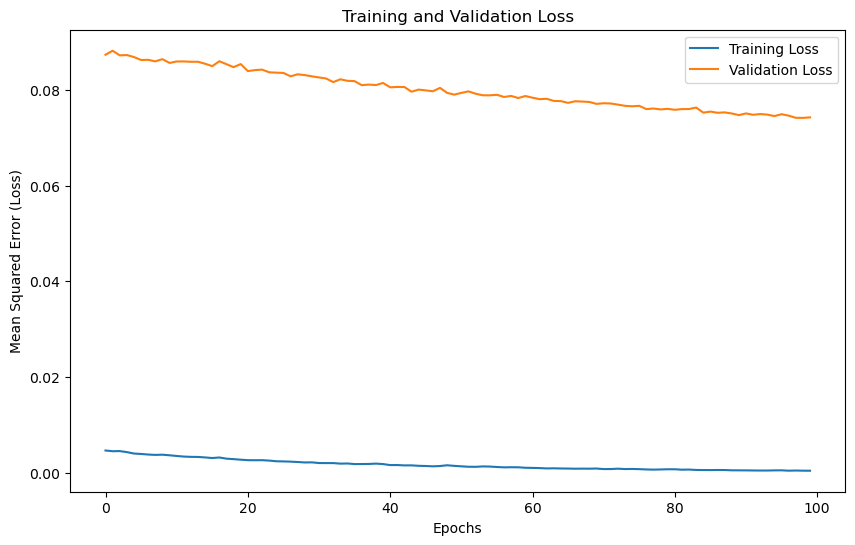

In [15]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

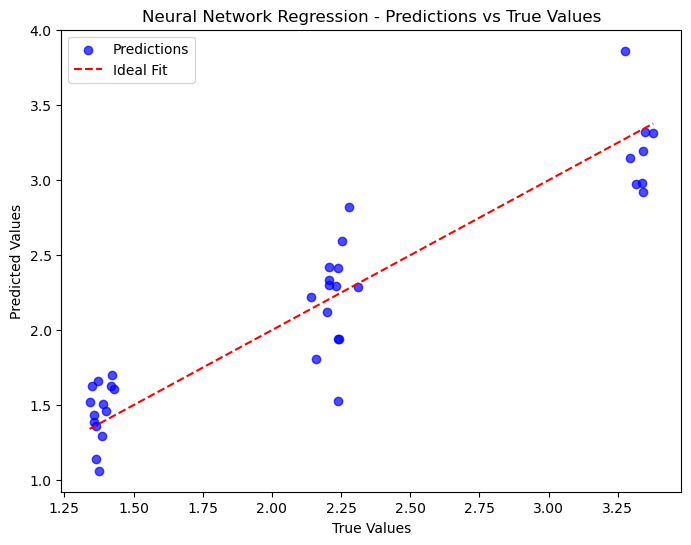

In [16]:
# Plot predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Regression - Predictions vs True Values')
plt.legend()
plt.show()